In [4]:
# import Pkg; Pkg.add(Pkg.PackageSpec(url="https://github.com/JuliaComputing/JuliaAcademyData.jl"))
using JuliaAcademyData; activate("Foundations of machine learning")

 Activating environment at `~/.julia/packages/JuliaAcademyData/1to3l/courses/Foundations of machine learning/Project.toml`


# Modeling data 2

## Building a model

Recall that in notebook 3, we saw that we could use a mathematical function to classify an image as an apple or a banana, based on the average amount of green in an image:

<img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Foundations%20of%20machine%20learning/data/data_flow.png" alt="Drawing" style="width: 500px;"/>


<img src="https://raw.githubusercontent.com/JuliaComputing/JuliaAcademyData.jl/master/courses/Foundations%20of%20machine%20learning/data/what_is_model.png" alt="Drawing" style="width: 300px;"/>

A common function for performing this kind of **classification** is the sigmoid that we saw in the last notebook, and that we will now extend by adding two **parameters**, $w$ and $b$:

$$\sigma(x; w, b) := \frac{1}{1 + \exp(-wx + b)}$$

$$ x = \mathrm{data} $$

\begin{align}
\sigma(x;w,b) &\approx 0 \implies \mathrm{apple} \\
\sigma(x;w,b) &\approx 1 \implies \mathrm{banana}
\end{align}

In our mathematical notation above, the `;` in the function differentiates between the **data** and the **parameters**. `x` is the data and is determined from the image. The parameters, `w` and `b`, are numbers which we choose to make our function match the results it should be modeling.

Note that in the code below, we don't distinguish between data and parameters - both are just inputs to our function, σ!

In [5]:
using Images, Statistics

apple = load(datapath("data/10_100.jpg"))
banana = load(datapath("data/104_100.jpg"))

apple_green_amount = mean(Float64.(green.(apple)))
banana_green_amount = mean(Float64.(green.(banana)))

println("Average green for apple = $apple_green_amount")
println("Average green for banana = $banana_green_amount")

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: `@get!(dict, key, default)` at /home/jake/.julia/packages/MacroTools/jYLA1/src/utils.jl:176 is deprecated, use `get!(()->default, dict, key)` instead.
└ @ Base deprecated.jl:204
┌ Warning: `@get!(dict, key, default)` at /home/jake/.julia/packages/MacroTools/jYLA1/src/utils.jl:197 is deprecated, use `get!(()->default, dict, key)` instead.
└ @ Base deprecated.jl:204
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1278
Average

In [6]:
σ(x, w, b) = 1 / (1 + exp(-w * x + b))

σ (generic function with 1 method)

What we want is that when we give σ as input the average green for the apple, roughly `x = 0.3385`, it should return as output something close to 0, meaning "apple". And when we give σ the input `x = 0.8808`, it should output something close to 1, meaning "banana".

By changing the parameters of the function, we can change the shape of the function, and hence make it represent, or **fit**, the data better!

## Data fitting by varying parameters

We can understand how our choice of `w` and `b` affects our model by seeing how our values for `w` and `b` change the plot of the $\sigma$ function.

In [7]:
using Plots; gr()   # GR works better for interactive manipulations
# using Ineract

Plots.GRBackend()

Run the code in the next cell. You should see two "sliders" appear, one for `w` and one for `b`.

**Game**:
Change w and b around until the blue curve, labeled "model", which is the graph of the `\sigma` function, passes through *both* of the data points at the same time.

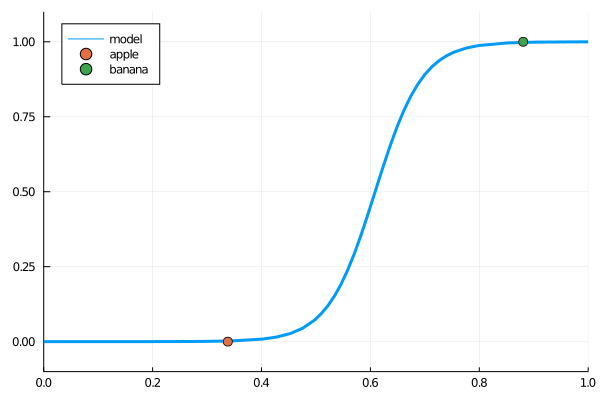

In [15]:
w = 23.0 # try manipulating w between -10 and 30
b = 14.0 # try manipulating b between 0 and 20

plot(x -> σ(x, w, b), xlim=(-0,1), ylim=(-0.1,1.1), label="model", legend=:topleft, lw=3)

scatter!([apple_green_amount],  [0.0], label="apple", ms=5)   # marker size = 5
scatter!([banana_green_amount], [1.0], label="banana", ms=5)

Notice that the two parameters do two very different things. The **weight**, `w`, determines *how fast* the transition between 0 and 1 occurs. It encodes how trustworthy we think our data  actually is, and in what range we should be putting points between 0 and 1 and thus calling them "unsure". The **bias**, `b`, encodes *where* on the $x$-axis the switch should take place. It can be seen as shifting the function left-right. We'll come to understand these *parameters* more in notebook 6.

Here are some parameter choices that work well:

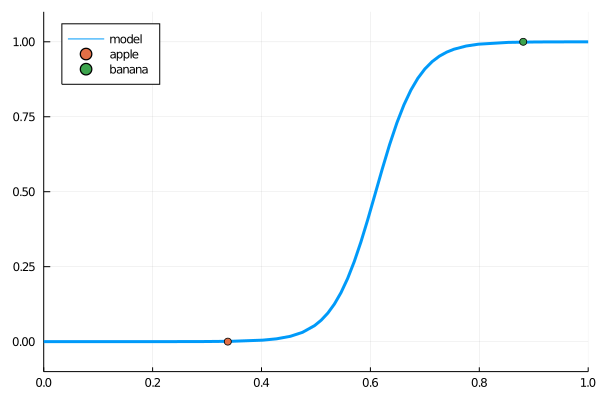

In [16]:
w = 25.58; b = 15.6

plot(x -> σ(x, w, b), xlim=(0,1), ylim=(-0.1,1.1), label="model", legend=:topleft, lw=3)

scatter!([apple_green_amount], [0.0], label="apple")
scatter!([banana_green_amount],[1.0], label="banana")

(Note that in this problem there are many combinations of `w` and `b` that fit the data well.)

Once we have a model, we have a computational representation for how to choose between "apple" and "banana". So let's pull in some new images and see what our model says about them!

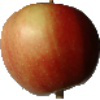

In [10]:
apple2 = load(datapath("data/107_100.jpg"))

green_amount = 0.4687290196078432


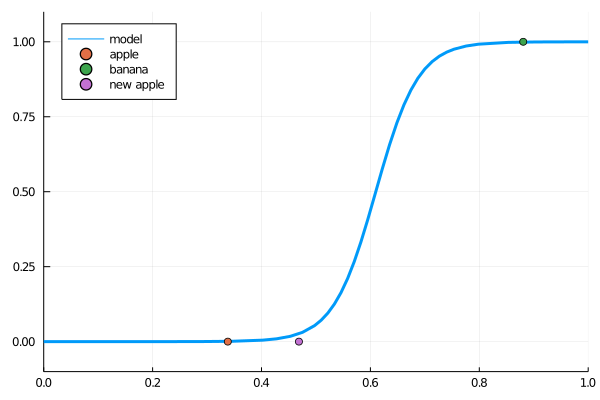

In [17]:
green_amount = mean(Float64.(green.(apple2)))
@show green_amount

scatter!([green_amount], [0.0], label="new apple")

Our model successfully says that our new image is an apple! Pat yourself on the back: you've actually just trained your first neural network!

#### Exercise 1

Load the image of a banana in `data/8_100.jpg` as `mybanana`. Edit the code below to calculate the amount of green in `mybanana` and to overlay data for this image with the existing model and data points.

#### Solution

To get the desired overlay, the code we need is

0.8806921568627452

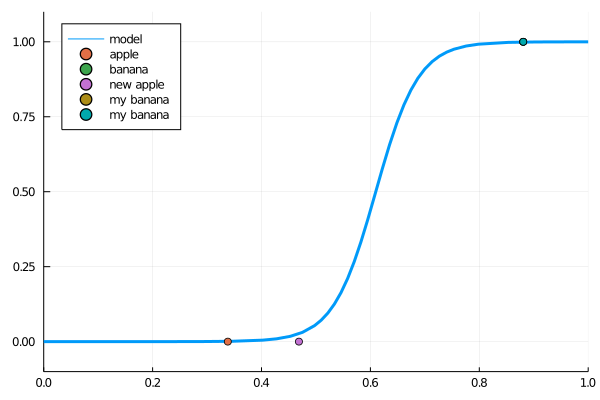

In [19]:
mybanana = load(datapath("data/8_100.jpg"))
mybanana_green_amount = mean(Float64.(green.(banana)))
# show(mybanana_green_amount)
scatter!([mybanana_green_amount], [1.0], label="my banana")

## Closing remarks: bigger models, more data, more accuracy

That last apple should start making you think: not all apples are red; some are yellow. "Redness" is one attribute of being an apple, but isn't the whole thing. What we need to do is incorporate more ideas into our model by allowing more inputs. However, more inputs would mean more parameters to play with. Also, we would like to have the computer start "learning" on its own, instead of modifying the parameters ourselves until we think it "looks right". How do we take the next step?

The first thing to think about is, if you wanted to incorporate more data into the model, how would you change the sigmoid function? Play around with some ideas. But also, start thinking about how you chose parameters. What process did you do to finally end up at good parameters? These two problems (working with models with more data and automatically choosing parameters) are the last remaining step to understanding deep learning.